In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(1)
dataTrain=pd.read_csv('ex4_train.csv')
dataTest=pd.read_csv('ex4_test.csv')

In [2]:
Input_train=np.array(dataTrain)
Xtrain=Input_train[:,1:401]
Htrain=np.array(dataTrain['y'])

In [3]:
def one_hot_Encoding(Y,classes):
    Yout=np.zeros((Y.shape[0],len(classes)))
    for i in range(0,len(Y)-1):
        indx=classes.index(Y[i])
        Yout[i,indx]=1
    return Yout

In [4]:
def create_placeholders(inputSize,outputSize):
    X = tf.placeholder("float", [None, inputSize])
    Y = tf.placeholder("float", [None, outputSize])
    return X,Y

In [5]:
def initialize_parameters(inputSize,layer1,layer2,outputSize):
    weights = {
        'w1': tf.get_variable("WW1", shape=[inputSize, layer1],initializer=tf.contrib.layers.xavier_initializer()),
        'w2': tf.get_variable("WW2", shape=[layer1, layer2],initializer=tf.contrib.layers.xavier_initializer()),
        'out': tf.get_variable("Wout", shape=[layer2, outputSize],initializer=tf.contrib.layers.xavier_initializer())
    }
    biases = {
        'b1': tf.get_variable("Bb1", shape=[layer1],initializer=tf.contrib.layers.xavier_initializer()),
        'b2': tf.get_variable("Bb2", shape=[layer2],initializer=tf.contrib.layers.xavier_initializer()),
        'out': tf.get_variable("Bout", shape=[outputSize],initializer=tf.contrib.layers.xavier_initializer())
    }
    return weights,biases

In [6]:
def forwardPropogation_dropout(x,prob,weights,biases):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(tf.cast(x,tf.float32), weights['w1']), biases['b1']))
    layer_2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])),prob)
    out_layer = tf.nn.sigmoid(tf.matmul(layer_2, weights['out']) + biases['out'])
    return out_layer

In [7]:
def computeCost(X,Y):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=X, labels=Y))

In [8]:
learning_rate = 0.001
display_step = 500
classes=[0,1,2,3,4,5,6,7,8,9]
layer1 = 250 
layer2 = 100 
inputSize = 400 
outputSize = 10 
Ytrain=one_hot_Encoding(Htrain,classes)
X,Y=create_placeholders(inputSize,outputSize)
weights,biases=initialize_parameters(inputSize,layer1,layer2,outputSize)

In [9]:
Input_test=np.array(dataTest)
Xtest=Input_test[:,1:401]
Htest=np.array(dataTest['y'])
Ytest=one_hot_Encoding(Htest,classes)

In [10]:
TrainAccuracy=[]
TestAccuracy=[]

In [11]:
logits = forwardPropogation_dropout(X,0.2,weights,biases)

probDropOut=[]
loss_op = computeCost(logits,Ytrain)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        avg_cost = 0.
        _, c = sess.run([train_op, loss_op], feed_dict={X: Xtrain,Y: Ytrain})

        avg_cost += c 
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))

    pred = tf.nn.softmax(logits)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    TrainAcc=accuracy.eval({X: Xtrain, Y: Ytrain})
    TrainAccuracy.append(TrainAcc)
    TestAcc=accuracy.eval({X: Xtest, Y: Ytest})
    TestAccuracy.append(TestAcc)
    print("   ")
    print("DropOut Prob = 0.2")
    print("Training Accuracy:", TrainAcc)
    print("Testing Accuracy:", TestAcc)

Epoch: 0001 cost=2.323278666
Epoch: 0501 cost=1.506493449
   
DropOut Prob = 0.2
Training Accuracy: 0.976286
Testing Accuracy: 0.923333


In [12]:
logits = forwardPropogation_dropout(X,0.6,weights,biases)
loss_op = computeCost(logits,Ytrain)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        avg_cost = 0.
        _, c = sess.run([train_op, loss_op], feed_dict={X: Xtrain,Y: Ytrain})

        avg_cost += c 
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))

    pred = tf.nn.softmax(logits)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    TrainAcc=accuracy.eval({X: Xtrain, Y: Ytrain})
    TrainAccuracy.append(TrainAcc)
    TestAcc=accuracy.eval({X: Xtest, Y: Ytest})
    TestAccuracy.append(TestAcc)
    print("   ")
    print("DropOut Prob = 0.6")
    print("Training Accuracy:", TrainAcc)
    print("Testing Accuracy:", TestAcc)

Epoch: 0001 cost=2.301612854
Epoch: 0501 cost=1.471931458
   
DropOut Prob = 0.6
Training Accuracy: 0.994857
Testing Accuracy: 0.938667


In [13]:
logits = forwardPropogation_dropout(X,0.95,weights,biases)
loss_op = computeCost(logits,Ytrain)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(1000):
        avg_cost = 0.
        _, c = sess.run([train_op, loss_op], feed_dict={X: Xtrain,Y: Ytrain})

        avg_cost += c 
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))

    pred = tf.nn.softmax(logits)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    TrainAcc=accuracy.eval({X: Xtrain, Y: Ytrain})
    TrainAccuracy.append(TrainAcc)
    TestAcc=accuracy.eval({X: Xtest, Y: Ytest})
    TestAccuracy.append(TestAcc)
    print("   ")
    print("DropOut Prob = 0.95")
    print("Training Accuracy:", TrainAcc)
    print("Testing Accuracy:", TestAcc)

Epoch: 0001 cost=2.308643341
Epoch: 0501 cost=1.472086549
   
DropOut Prob = 0.95
Training Accuracy: 0.989143
Testing Accuracy: 0.940667


In [14]:
prob=[0.2,0.6,0.95]

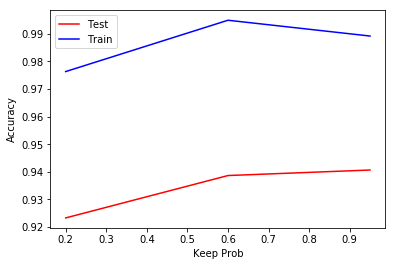

In [15]:
plt.plot(prob, TestAccuracy,'r',label="Test") 
plt.plot(prob, TrainAccuracy,'b',label="Train") 
plt.xlabel("Keep Prob")
plt.ylabel("Accuracy")
plt.legend()
plt.show()